In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
plt.rcParams['figure.figsize']=7,7

# Monte Carlo integration

Problem is to solve

$\int_0^{\infty} x^3 \exp{(- \frac{x^2}{2\sigma^2})} dx = 2 \sigma^4 $

We can use half a gaussian as the $p(x)$ and have $f(x)=x^3$

$p(x) = \frac{1}{\sigma} \sqrt{\frac{2}{\pi}} \exp{(- \frac{x^2}{2\sigma^2})}$

Using this info, we can solve instead for

$\int_0^{\infty} x^3  \frac{1}{\sigma} \sqrt{\frac{2}{\pi}} \exp{(- \frac{x^2}{2\sigma^2})} dx = 2  \sqrt{\frac{2}{\pi}} \sigma^3 $

In [71]:
sigma=1
N=10000
g=stats.halfnorm(scale=sigma)

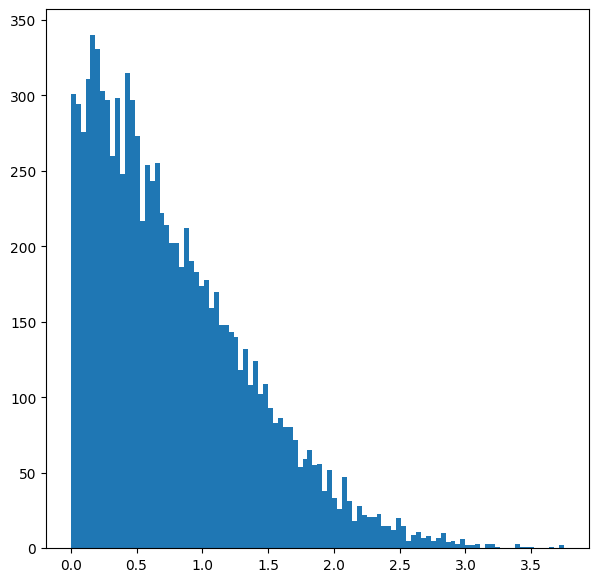

In [72]:
sample = g.rvs(N)
plt.hist(sample,bins=100)
plt.show()

In [98]:
def fun(x):
    return x**3
y=np.mean(fun(sample))

print(y,2*np.sqrt(2/np.pi)*sigma**3)

1.5947991816818052 1.5957691216057308


In [74]:
np.sum(fun(sample))/N

np.float64(1.5759179129255856)

In [117]:
N=1000
y=np.zeros(1000)
for i in range(1000):
    sample = g.rvs(N)
    y[i]=np.sum(fun(sample))/N

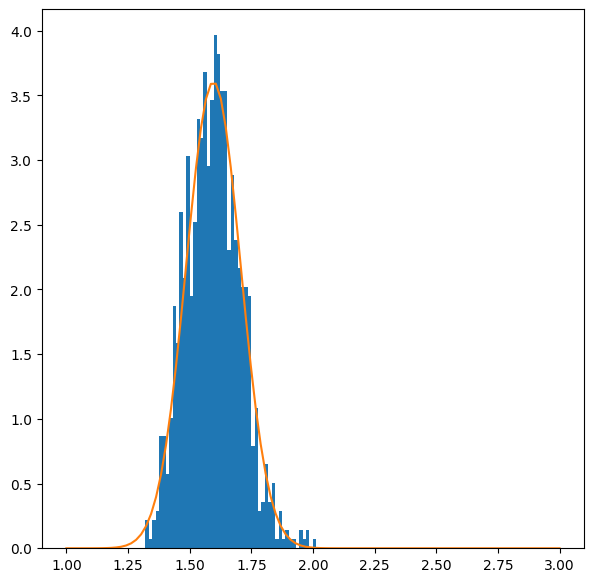

In [121]:
plt.hist(y,bins=50,density=True)
std=np.std(y)
mean=np.mean(y)
g2=stats.norm(loc=mean,scale=std)
x=np.linspace(1,3,100)
plt.plot(x,g2.pdf(x))
plt.show()

In [116]:
std

np.float64(0.00362408948305827)

As expected, with larger N, we get a closer value. 

For a given N, we see that first the distribution is one tailed, but once N increases, running the MC integration several times, makes the distribution look more gaussian

In [91]:
Nvals=np.unique(np.logspace(0,6,100,dtype=int))

In [99]:
def integral(N,sigma):
    g=stats.halfnorm(scale=sigma)
    sample = g.rvs(N)
    return np.mean(sample**3)

In [103]:
results = np.array([integral(N,sigma) for N in Nvals])
T=2*np.sqrt(2/np.pi)*sigma**3


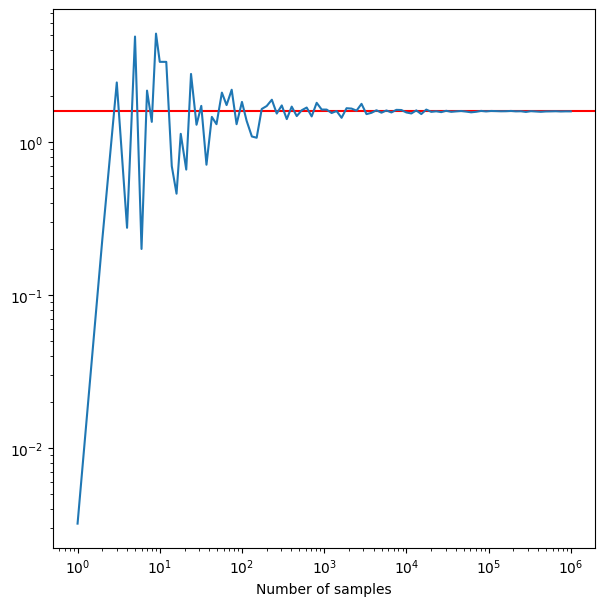

In [107]:
plt.axhline(T,c='red')
plt.plot(Nvals,results)
plt.loglog()
plt.xlabel('Number of samples')
plt.show()

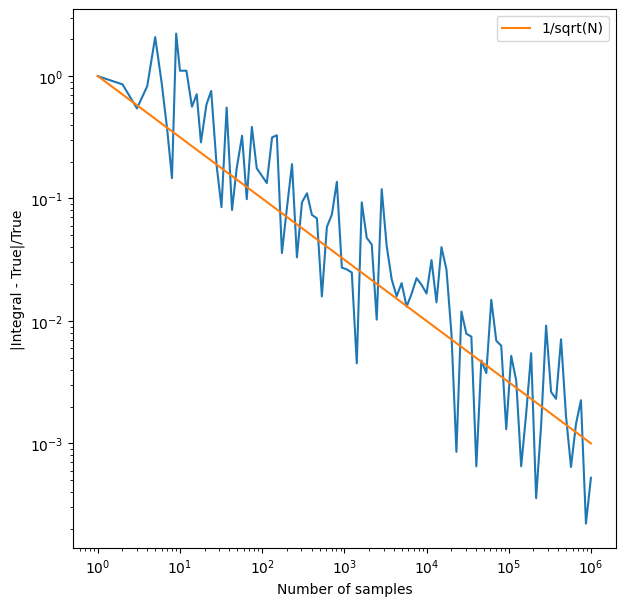

In [110]:
plt.plot(Nvals, np.abs((results - T))/T)
plt.plot(Nvals, Nvals**-0.5,label=r'1/sqrt(N)')
plt.xlabel("Number of samples")
plt.ylabel(r"|Integral - True|/True")
plt.loglog()
plt.legend()
plt.show()

# Kicking horses

In [152]:
d = np.array([0,1,2,3,4])
n = np.array([109,65,22,3,1])
N=np.sum(n)

freq = n/N

mean = np.average(d,weights=freq)
std =np.sqrt(mean)

p1=stats.poisson(mean)

print(mean,std)


0.6100000000000001 0.7810249675906655


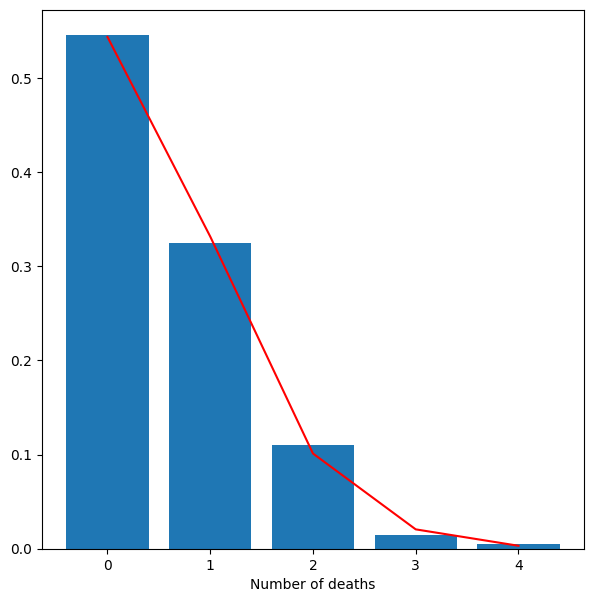

In [151]:
plt.bar(d,freq)
plt.plot(d,p1.pmf(d),'red')
plt.xlabel('Number of deaths')
plt.show()

np.float64(40.0)